In [273]:
import networkx as nx
%matplotlib inline
from matplotlib import pyplot as plt

In [274]:
M=nx.read_gml("polblogs.gml")

In [275]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

### 1.  Create a nice looking graph of the political blog network

### 2.  What are the 10 most influential blogs?

### 3.  What are the 10 least influential blogs?



### 4.  Answer this question for both left wing and right wing blogs seperately.  (Optional 10 Extra Credit Points)

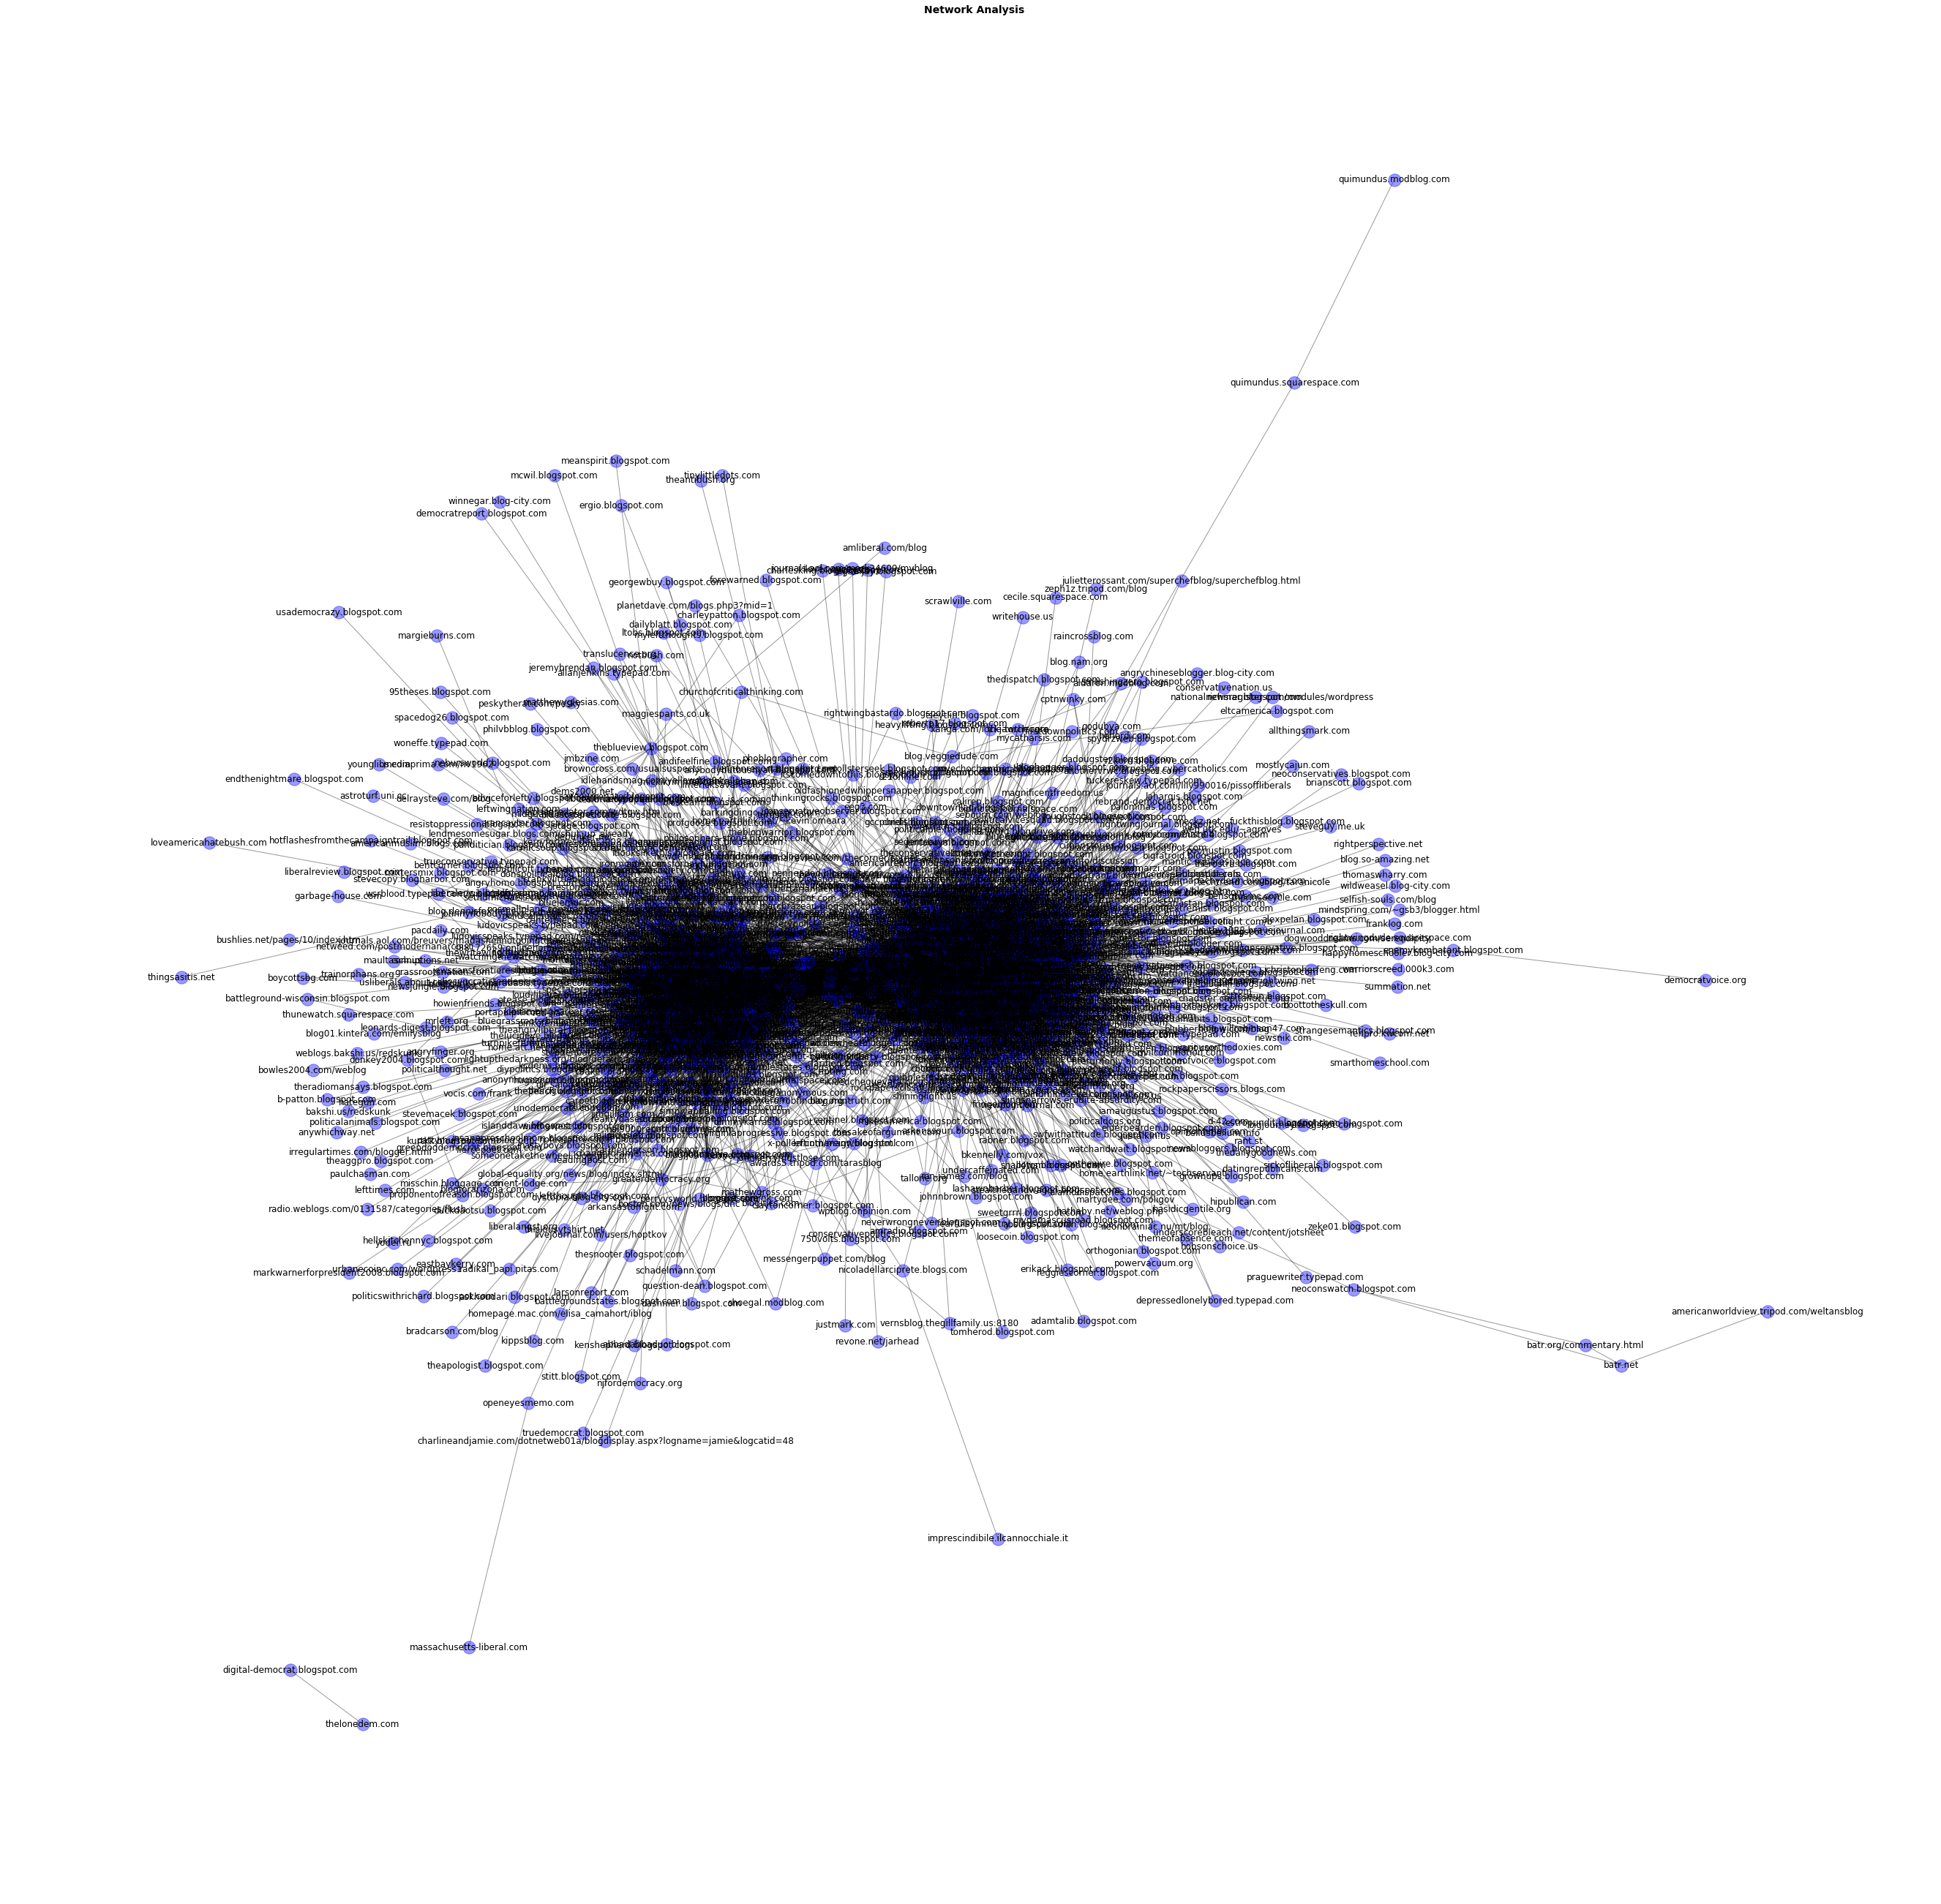

In [276]:
#Draw graph of the political blog network
plt.figure(figsize=(47,47))
pos=nx.spring_layout(G, iterations=500, scale=5, k=0.9)
nx.draw_networkx_labels(G,pos,fontsize=10)
font = {'fontname'   : 'Helvetica',
        'color'      : 'k',
        'fontweight' : 'bold',
        'fontsize'   : 14}
plt.title("Network Analysis", font)

nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

In [316]:
#Display the importance of the nodes
centrality = nx.eigenvector_centrality_numpy(G)
#Sort the centrality in descending order
bloglist = []
for node in centrality:
    bloglist.append((node,centrality[node]))
sorted_bloglist = bloglist.sort(key=lambda x: x[1])
sorted(bloglist, key=lambda x: x[1], reverse=True)

[(u'atrios.blogspot.com', 0.19460836007497956),
 (u'dailykos.com', 0.16085880865133695),
 (u'washingtonmonthly.com', 0.14572953582904324),
 (u'digbysblog.blogspot.com', 0.14165745601016716),
 (u'bodyandsoul.typepad.com', 0.14001258615025966),
 (u'liberaloasis.com', 0.1387043087124381),
 (u'tbogg.blogspot.com', 0.13695090011935745),
 (u'corrente.blogspot.com', 0.1286646708766482),
 (u'talkingpointsmemo.com', 0.12715536738447392),
 (u'dneiwert.blogspot.com', 0.12147092830075569),
 (u'pandagon.net', 0.12097858368894839),
 (u'billmon.org', 0.11660426776905002),
 (u'xnerg.blogspot.com', 0.1140448405932511),
 (u'madkane.com/notable.html', 0.1134326679328856),
 (u'elayneriggs.blogspot.com', 0.11179345712895328),
 (u'busybusybusy.com', 0.10960043432858944),
 (u'instapundit.com', 0.1069192450398948),
 (u'michaelberube.com', 0.1052925570915922),
 (u'pacificviews.org', 0.10497670909352745),
 (u'nielsenhayden.com/electrolite', 0.1047469823493036),
 (u'prospect.org/weblog', 0.10452079323103279),
 (

In [317]:
#10 most influential blogs
#Show ten highest centrality
top_ten(centrality)

[u'thelonedem.com',
 u'digital-democrat.blogspot.com',
 u'americanworldview.tripod.com/weltansblog',
 u'quimundus.modblog.com',
 u'batr.org/commentary.html',
 u'batr.net',
 u'democratvoice.org',
 u'quimundus.squarespace.com',
 u'massachusetts-liberal.com',
 u'thingsasitis.net']

In [318]:
#10 least influential blogs
#Show ten lowest centrality
def top_ten(centrality):
    """10 most influential blogs"""
    top = list((sorted((rank, node)
    for node, rank in centrality.items())))[:10]
    return [node for rank, node in top]
top_ten(centrality)

[u'thelonedem.com',
 u'digital-democrat.blogspot.com',
 u'americanworldview.tripod.com/weltansblog',
 u'quimundus.modblog.com',
 u'batr.org/commentary.html',
 u'batr.net',
 u'democratvoice.org',
 u'quimundus.squarespace.com',
 u'massachusetts-liberal.com',
 u'thingsasitis.net']

In [319]:
nx.write_gexf(G,'NetworkAnalysisLiaoWen.gexf')